 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [33]:
pwd

'C:\\Users\\cpere\\Documents\\p504\\pepp-mal-virt-fin-pt-04-2021-u-c-master\\02-Homework\\04-Pandas\\Instructions\\Starter_Code'

In [316]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [317]:
# Reading whale returns
wr_path = Path("Resources\\whale_returns.csv")
whale_df = pd.read_csv(wr_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [318]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [319]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [320]:
# Reading algorithmic returns
algo_path = Path("Resources\\algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [321]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [322]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [323]:
algo_df = algo_df.rename(columns={"Algo 1": "Daily Returns_1", "Algo 2": "Daily Returns_2"})
algo_df

,Daily Returns_1,Daily Returns_2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [324]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources\\sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [325]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [326]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [327]:
# Calculate Daily Returns
DR_SP500 = sp500_df.pct_change()
DR_SP500

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [328]:
# Drop nulls
DR_SP500 = DR_SP500.dropna()
DR_SP500

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [329]:
# Rename `Close` Column to be specific to this portfolio.
DR_SP500 = DR_SP500.rename(columns={"Close": "SP500_Daily Returns"})
DR_SP500

,SP500_Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [330]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combine_DF = pd.concat([whale_df, algo_df, DR_SP500], axis="columns", join = "inner")

#all_prices = pd.concat([amd, mu], axis="rows", join="inner")
Combine_DF.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily Returns_1,Daily Returns_2,SP500_Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

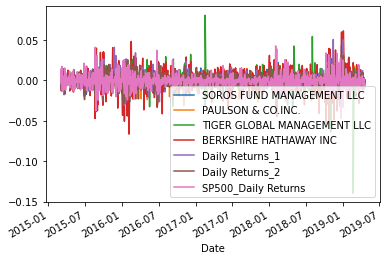

In [331]:
# Plot daily returns of all portfolios
Combine_DF.pct_change()
comb_data_frame = Combine_DF.dropna()
comb_data_frame.plot()

In [332]:
comb_data_frame.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily Returns_1,Daily Returns_2,SP500_Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


#### Calculate and Plot cumulative returns.

SOROS FUND MANAGEMENT LLC     -1.002586
PAULSON & CO.INC.             -1.007333
TIGER GLOBAL MANAGEMENT LLC   -1.003640
BERKSHIRE HATHAWAY INC        -1.001088
Daily Returns_1               -0.999323
Daily Returns_2               -1.001936
SP500_Daily Returns           -1.008764
dtype: float64


<AxesSubplot:>

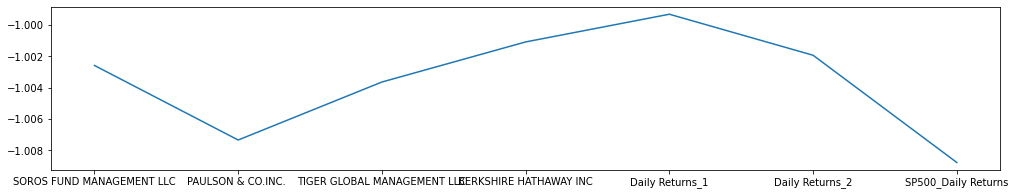

In [333]:
# Calculate cumulative returns of all portfolios
cum_returns = (comb_data_frame.iloc[-1]- comb_data_frame.iloc[0]/comb_data_frame.iloc[0])
print(cum_returns)
# Plot cumulative returns
cum_returns.plot(figsize = (17,3))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

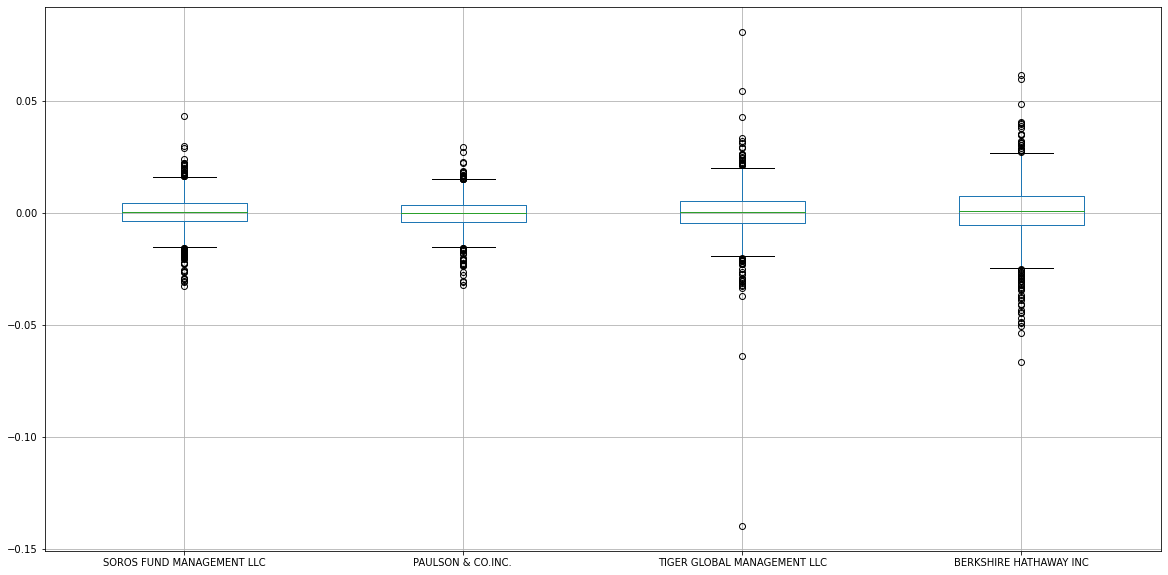

In [334]:
# Box plot to visually show risk
whale_df.boxplot(figsize=(20,10))

<AxesSubplot:>

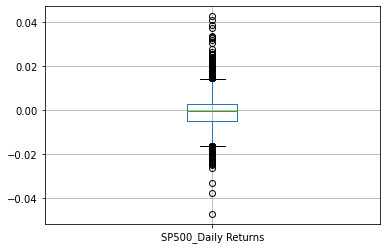

In [335]:
DR_SP500.boxplot()

<AxesSubplot:>

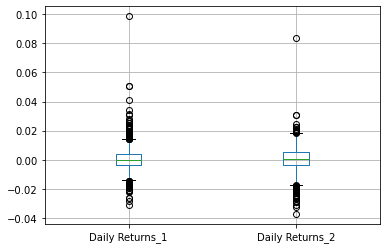

In [336]:
algo_df.boxplot()

<AxesSubplot:>

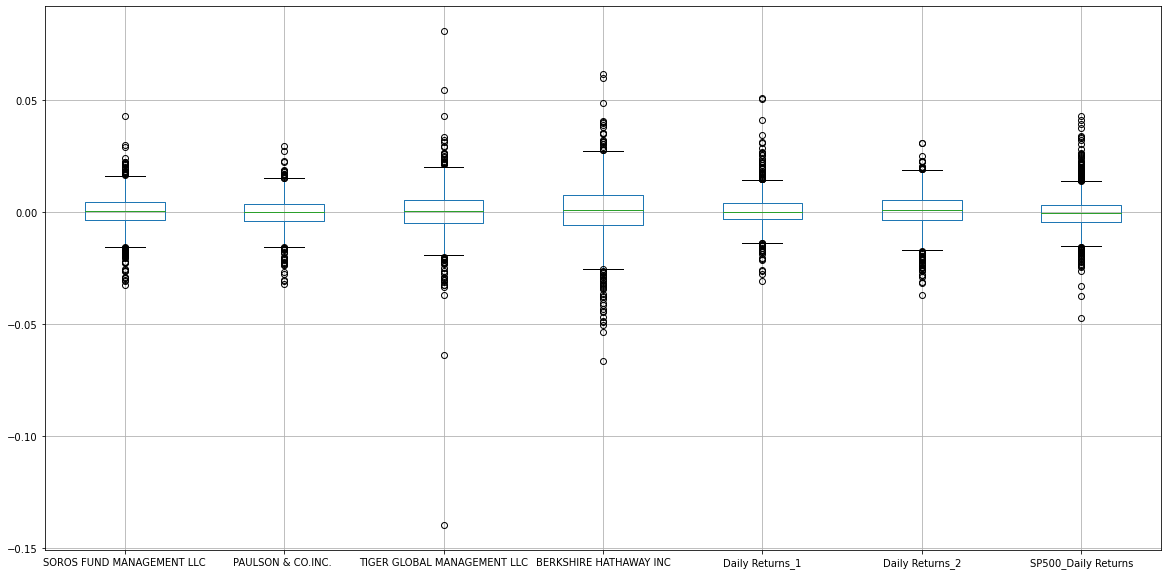

In [337]:
comb_data_frame.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [338]:
# Calculate the daily standard deviations of all portfolios
whale_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [340]:
algo_df.std()

Daily Returns_1    0.007988
Daily Returns_2    0.008466
dtype: float64

In [341]:
DR_SP500.std()

SP500_Daily Returns    0.008135
dtype: float64

In [277]:
comb_data_frame.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Daily Returns_1                0.007623
Daily Returns_2                0.008341
SP500_Daily Returns            0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [342]:
# Calculate  the daily standard deviation of S&P 500
DR_SP500.std()

# Determine which portfolios are riskier than the S&P 500
#Looking at the standard deviation for all looks like 
#TIGER GLOBAL MANAGEMENT LLC    0.010897
#BERKSHIRE HATHAWAY INC         0.012919
#are the riskier portfolios

SP500_Daily Returns    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [343]:
# Calculate the annualized standard deviation (252 trading days)
annual_var = (comb_data_frame.var()*252)
annua_st = np.sqrt(annual_var)
annua_st

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Daily Returns_1                0.121006
Daily Returns_2                0.132413
SP500_Daily Returns            0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

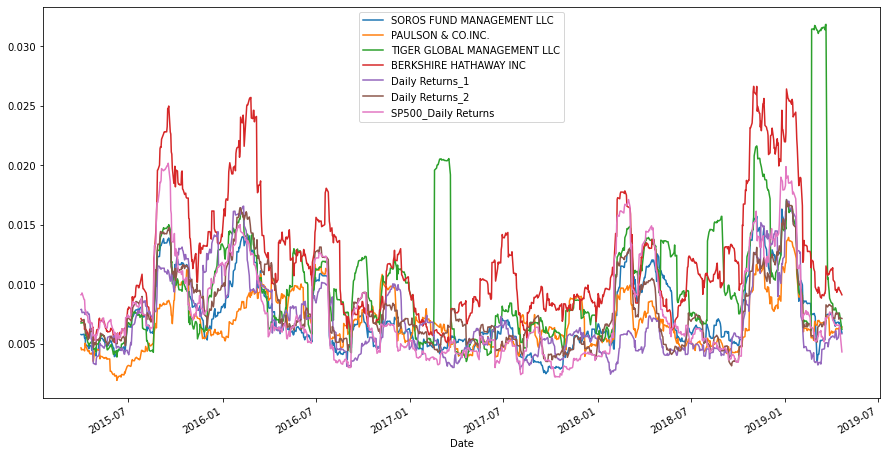

In [306]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_sd = comb_data_frame.rolling(window=21)

# Plot the rolling standard deviation
rolling_sd.std().plot(figsize=(15,8))

### Calculate and plot the correlation

In [311]:
# Calculate the correlation

correlation = comb_data_frame.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily Returns_1,Daily Returns_2,SP500_Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Daily Returns_1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Daily Returns_2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500_Daily Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [364]:
# Calculate covariance of a single portfolio

cov = comb_data_frame['TIGER GLOBAL MANAGEMENT LLC'].cov(comb_data_frame['SP500_Daily Returns'])

# Calculate variance of S&P 500

var = comb_data_frame['SP500_Daily Returns'].var()

# Computing beta

TIGER_beta = cov / var

# Plot beta trend
TIGER_beta

-0.001909702751237244

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

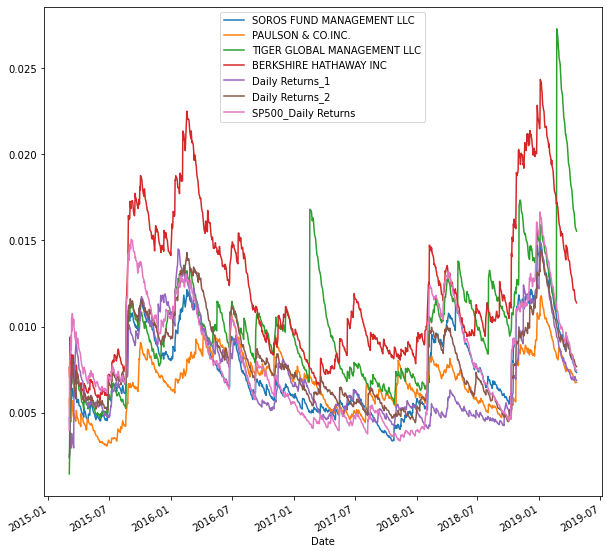

In [373]:
# Use `ewm` to calculate the rolling window

comb_data_frame.ewm(halflife=21).std().plot(figsize=(10,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [374]:
# Annualized Sharpe Ratios
sharpe_ratios = (comb_data_frame.mean() * 252) / (comb_data_frame.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Daily Returns_1                1.369589
Daily Returns_2                0.484334
SP500_Daily Returns           -0.518582
dtype: float64

<AxesSubplot:>

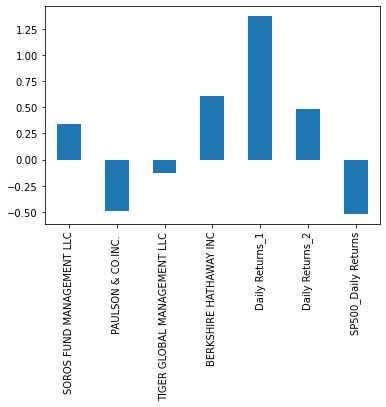

In [376]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [391]:
# Reading data from 1st stock
google_path = Path("Resources\\goog_historical.csv")
google_df = pd.read_csv(google_path, index_col ="Trade DATE", parse_dates = True, infer_datetime_format=True)
google_df.rename( columns={"NOCP":"GOOG"},inplace = True )
google_df.drop(columns=['Symbol'], axis=1,inplace = True)
google_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [394]:
# Reading data from 2nd stock
apple_path = Path("Resources\\aapl_historical.csv")
apple_df = pd.read_csv(apple_path, index_col ="Trade DATE", parse_dates = True, infer_datetime_format=True)
apple_df.rename( columns={"NOCP":"AAPL"},inplace = True )
apple_df.drop(columns=['Symbol'], axis=1,inplace = True)
apple_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [395]:
# Reading data from 3rd stock
cost_path = Path("Resources\\cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col ="Trade DATE", parse_dates = True, infer_datetime_format=True)
cost_df.rename( columns={"NOCP":"COST"},inplace = True )
cost_df.drop(columns=['Symbol'], axis=1,inplace = True)
cost_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [403]:
# Combine all stocks in a single DataFrame
combine_3 = pd.concat([google_df,apple_df,cost_df], axis='columns', join='inner')
combine_3.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [406]:
# Reset Date index
combine_3.sort_index(inplace=True)
combine_3

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [415]:
# Calculate daily returns

stock_dr = combine_3.pct_change()
# Drop NAs

stock_dr = stock_dr.dropna()

# Display sample data
stock_dr.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [418]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

Weighted_returns = stock_dr.dot(weights)

# Display sample data
Weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [422]:
# Join your returns DataFrame to the original returns DataFrame
combined_all = pd.concat([Weighted_returns, comb_data_frame], axis='columns', join='inner')

combined_all.rename(columns= {0: "Custom"},inplace = True )
combined_all.dropna(inplace=True)
combined_all.sort_index()
combined_all.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily Returns_1,Daily Returns_2,SP500_Daily Returns
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [424]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_all.dropna()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily Returns_1,Daily Returns_2,SP500_Daily Returns
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.007522,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [437]:
# Calculate the annualized `std`
combined_all.std()


annualized_sd = (combined_all.var()*252)
annualized_sd = np.sqrt(annualized_sd)
annualized_sd

Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Daily Returns_1                0.133927
Daily Returns_2                0.139499
SP500_Daily Returns            0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [438]:
# Calculate rolling standard deviation
rolling_sd_2 = annualized_sd.rolling

# Plot rolling standard deviation
rolling_sd_2

<bound method NDFrame._add_series_or_dataframe_operations.<locals>.rolling of Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Daily Returns_1                0.133927
Daily Returns_2                0.139499
SP500_Daily Returns            0.152469
dtype: float64>

### Calculate and plot the correlation

<AxesSubplot:>

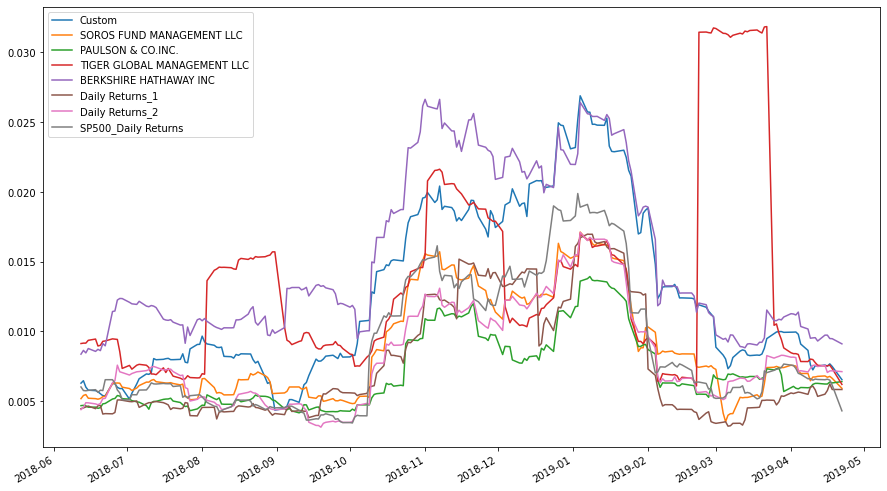

In [441]:
# Calculate and plot the correlation

combined_all.rolling(window=21).std().plot(figsize=(15,9))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [449]:
# Calculate and plot Beta

cov_2 = combined_all["Custom"].cov(combined_all['SP500_Daily Returns'])



# Calculate variance of S&P 500

var_2 = combined_all['SP500_Daily Returns'].var()

# Computing beta

Custom_beta = cov / var

# Plot beta trend

Custom_beta = cov_2 / var_2

Custom_beta

0.007777644779290083

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [451]:
# Calculate Annualzied Sharpe Ratios
sr_all = (combined_all.mean() * 252) / ((combined_all).std() * np.sqrt(252))

sr_all

Custom                         0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Daily Returns_1                2.001260
Daily Returns_2                0.007334
SP500_Daily Returns           -0.427676
dtype: float64

<AxesSubplot:>

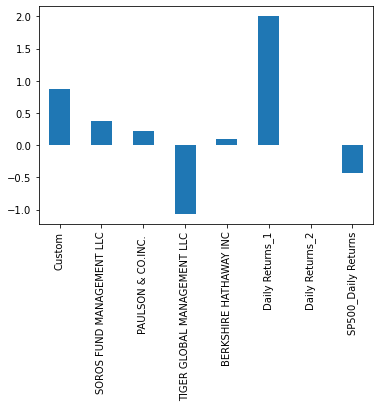

In [453]:
# Visualize the sharpe ratios as a bar plot
sr_all.plot.bar()

In [ ]:
### How does your portfolio do?

Write your answer here!

In [ ]:
#It looks like it outperfomr the others 